# Statistical seismology and the Parkfield experiment


**The Gutenberg-Ritcher Law**

The magnitudes of earthquakes in a given region over a given period are Exponentially distributed
One parameter given by mean of magnitude - mt, describes the earthqauke magnitude of the region. 

The b-value is used ,
 b = (mean of magnitude -mt).log(10)

In [52]:
# importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import dc_stat_think as dcst
from datetime import date
%matplotlib inline 

In [28]:
# getting the data 
parkefield = pd.read_csv('datasets/parkfield_earthquakes_1950-2017.csv',comment='#')
oklahoma = pd.read_csv('datasets/oklahoma_earthquakes_1950-2017.csv',comment='#',date_parser='time')

In [29]:
parkefield.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,depthError,magError,magNst,status,locationSource,magSource,loc_name,loc_admin1,loc_admin2,loc_cc
0,1951-10-03 13:44:33.170,35.869333,-120.451000,6.0,3.67,ml,6.0,259.0,1.5480,0.43,...,31.61,0.154,10.0,reviewed,ci,ci,Shandon,California,San Luis Obispo County,US
1,1953-05-28 07:58:34.510,36.004167,-120.501167,6.0,3.61,ml,7.0,296.0,0.9139,0.39,...,31.61,NaN,1.0,reviewed,ci,ci,Coalinga,California,Fresno County,US
2,1961-12-14 11:51:15.410,35.970000,-120.470167,6.0,3.95,ml,12.0,297.0,0.8718,0.51,...,31.61,0.070,11.0,reviewed,ci,ci,Coalinga,California,Fresno County,US
3,1965-02-21 18:39:24.500,35.881000,-120.383500,6.0,3.54,ml,10.0,257.0,1.5380,0.56,...,31.61,0.048,11.0,reviewed,ci,ci,Shandon,California,San Luis Obispo County,US
4,1966-06-28 04:18:36.180,35.856500,-120.446167,6.0,3.15,ml,7.0,259.0,1.3120,0.32,...,31.61,0.105,7.0,reviewed,ci,ci,Shandon,California,San Luis Obispo County,US


In [5]:
mags = parkefield.mag.values

In [22]:
oklahoma.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,depthError,magError,magNst,status,locationSource,magSource,loc_name,loc_admin1,loc_admin2,loc_cc
0,1974-12-16 02:30:21.400,35.330,-97.480,10.0,2.6,ml,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,reviewed,m,tul,Moore,Oklahoma,Cleveland County,US
1,1975-09-13 01:25:02.800,34.139,-97.369,5.0,3.4,lg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,reviewed,us,tul,Wilson,Oklahoma,Carter County,US
2,1975-10-12 02:58:11.200,34.816,-97.406,20.0,3.2,lg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,reviewed,us,tul,Maysville,Oklahoma,Garvin County,US
3,1975-11-29 14:29:40.900,34.521,-97.347,5.0,3.5,lg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,reviewed,us,slm,Wynnewood,Oklahoma,Garvin County,US
4,1976-04-16 18:59:44.200,36.107,-99.875,5.0,3.4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,reviewed,us,tul,Arnett,Oklahoma,Ellis County,US


**Parkfield earthquake magnitudes**

We will start with EDA and plot the ECDF of the magnitudes of earthquakes detected in the Parkfield region from 1950 to 2016

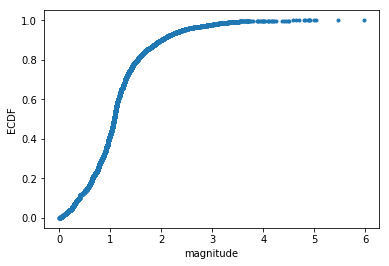

In [9]:
# Make the plot
_ = plt.plot(*dcst.ecdf(mags),marker='.',linestyle='none')

# Label axes and show plot
_ = plt.xlabel('magnitude')
_ = plt.ylabel('ECDF')
plt.show()

Note the distinctive roll-off at magnitudes below 1.0.
This is because the value below 1 are hard to detect.

**Computing the b-value**

The b-value is a common metric for the seismicity of a region. We can imagine weu would like to calculate it often when working with earthquake data.

In [10]:
def b_value(mags,mt,perc=[2.5,97.5], n_reps=None):
    """Compute the b-value and optionally its confidence interval."""
    # Extract magnitudes above completeness threshold: m
    m = mags[mags >= mt]

    # Compute b-value: b
    b = (np.mean(m)-mt)*np.log(10)

    # Draw bootstrap replicates
    if n_reps is None:
        return b
    else:
        m_bs_reps = dcst.draw_bs_reps(m,np.mean,size=n_reps)

        # Compute b-value from replicates: b_bs_reps
        b_bs_reps = (m_bs_reps - mt) * np.log(10)

        # Compute confidence interval: conf_int
        conf_int = np.percentile(b_bs_reps,perc)
    
        return b, conf_int


**The b-value for Parkfield**

The ECDF is effective at exposing roll-off, as we could see below magnitude 1. Because there are plenty of earthquakes above magnitude 3, we can use mt = 3 as our completeness threshold. With this completeness threshold, let us compute the b-value for the Parkfield region from 1950 to 2016, along with the 95% confidence interval. 

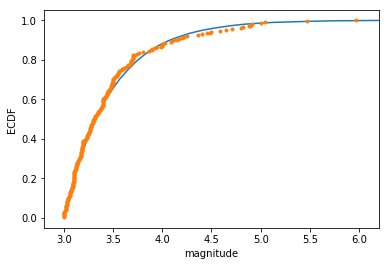


b-value: 1.08
95% conf int: [0.94, 1.24]


In [13]:
# Compute b-value and 95% confidence interval
mt =3 
b, conf_int = b_value(mags,mt=3, perc=[2.5, 97.5], n_reps=10000)

# Generate samples to for theoretical ECDF
m_theor = np.random.exponential(b/np.log(10), size=100000) + 3

# Plot the theoretical CDF
_ = plt.plot(*dcst.ecdf(m_theor))

# Plot the ECDF (slicing mags >= mt)
_ = plt.plot(*dcst.ecdf(mags[mags >= mt]), marker='.', linestyle='none')

# Pretty up and show the plot
_ = plt.xlabel('magnitude')
_ = plt.ylabel('ECDF')
_ = plt.xlim(2.8, 6.2)
plt.show()

# Report the results
print("""
b-value: {0:.2f}
95% conf int: [{1:.2f}, {2:.2f}]""".format(b, *conf_int))


Parkfield seems to follow the Gutenberg-Richter law very well. The b-value of about 1 is typical for regions along fault zones.

#### We will now look for timings of earthquakes 

**Models for earthquake timing**
1. Exponential: Earthquake happen like Poisson Process
2. Gaussian : Earthquake will happen with a well-defined period

#### Interearthquake time estimates for Parkfield

We first compute the best estimates for the parameters for the Exponential and Gaussian models for interearthquake times. We then plot the theoretical CDFs for the respective models along with the formal ECDF of the actual Parkfield interearthquake times.

In [14]:
time_gap = np.array([24.06570842, 20.07665982, 21.01848049, 12.24640657, 32.05475702,
       38.2532512 ])

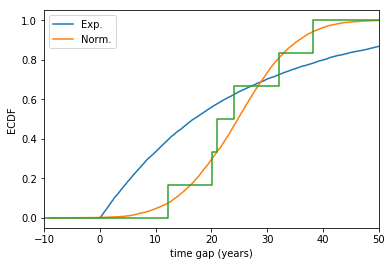

In [15]:
# Compute the mean time gap: mean_time_gap
mean_time_gap = np.mean(time_gap)

# Standard deviation of the time gap: std_time_gap
std_time_gap = np.std(time_gap)

# Generate theoretical Exponential distribution of timings: time_gap_exp
time_gap_exp = np.random.exponential(mean_time_gap,size=10000)

# Generate theoretical Normal distribution of timings: time_gap_norm
time_gap_norm = np.random.normal(mean_time_gap,std_time_gap,size=10000)

# Plot theoretical CDFs
_ = plt.plot(*dcst.ecdf(time_gap_exp))
_ = plt.plot(*dcst.ecdf(time_gap_norm))

# Plot Parkfield ECDF
_ = plt.plot(*dcst.ecdf(time_gap,formal=True,min_x=-10,max_x=50))

# Add legend
_ = plt.legend(('Exp.', 'Norm.'), loc='upper left')

# Label axes, set limits and show plot
_ = plt.xlabel('time gap (years)')
_ = plt.ylabel('ECDF')
_ = plt.xlim(-10, 50)
plt.show()


By eye, the Gaussian model seems to describe the observed data best. We will investigate the consequences of this in the next exercise, and see if we can reject the Exponential model.

**When will the next big Parkfield quake be?**

The last big earthquake in the Parkfield region was on the evening of September 27, 2004 local time. Our task is to get an estimate as to when the next Parkfield quake will be, assuming the Exponential model and also the Gaussian model. In both cases, the best estimate is given by the mean time gap, which we just computed.Let us compute 95% confidence intervals on when the next earthquake will be 

In [17]:
today = 2018.8538974466471
last_quake =2004.74
# Draw samples from the Exponential distribution: exp_samples
exp_samples = np.random.exponential(mean_time_gap,size=100000)

# Draw samples from the Normal distribution: norm_samples
norm_samples = np.random.normal(mean_time_gap,std_time_gap,size=100000)

# No earthquake as of today, so only keep samples that are long enough
exp_samples = exp_samples[exp_samples > today - last_quake]
norm_samples = norm_samples[norm_samples > today - last_quake]

# Compute the confidence intervals with medians
conf_int_exp = np.percentile(exp_samples, [2.5, 50, 97.5]) + last_quake
conf_int_norm = np.percentile(norm_samples, [2.5, 50, 97.5]) + last_quake

# Print the results
print('Exponential:', conf_int_exp)
print('     Normal:', conf_int_norm)


Exponential: [2019.43723351 2035.92883598 2110.32198787]
     Normal: [2019.8092455  2030.47304052 2046.27500372]


 The models given decidedly different predictions. The Gaussian model says the next earthquake is almost sure to be in the next few decades, but the Exponential model says we may very well have to wait longer.

#### Hypothesis test on Nankai megathrust earthquakes

**Hypothesis:** The time between Nankai trough earthquake is normally distributed with a mean and standard deviation as per the data

**Test Statistic:** The Kolmogorov-Smirnov statistic

**At least as extreme as:** >= Observed KS statistic.

**Simulating the Null Hypothesis**
Draw lot of samples out of theoritical distribution and store them
- Draw n samples out of theoritical distributions
- Compute KS statistic from the samples

In [19]:
def ks_stat(data1, data2):
    # Compute ECDF from data: x, y
    x,y = dcst.ecdf(data1)
    
    # Compute corresponding values of the target CDF
    cdf = dcst.ecdf_formal(x,data2)

    # Compute distances between concave corners and CDF
    D_top = y - cdf

    # Compute distance between convex corners and CDF
    D_bottom = cdf - y + 1/len(data1)
    return np.max((D_top, D_bottom))

def draw_ks_reps(n,f,args=(),size=10000,n_reps=10000):
    # Generate samples from target distribution
    x_f = f(*args,size=size)
    
    # Initialize K-S replicates
    reps = np.empty(n_reps)
    
    # Draw replicates
    for i in range(n_reps):
        # Draw samples for comparison
        x_samp = f(*args,size=n)
        
        # Compute K-S statistic
        reps[i] = dcst.ks_stat(x_samp,x_f)

    return reps

**The K-S test for Exponentiality**

Ttest the null hypothesis that the interearthquake times of the Parkfield sequence are Exponentially distributed. That is, earthquakes happen at random with no memory of when the last one was

In [20]:
# Draw target distribution: x_f
x_f = np.random.exponential(mean_time_gap,size=10000)

# Compute K-S stat: d
d = dcst.ks_stat(time_gap,x_f)

# Draw K-S replicates: reps
reps = dcst.draw_ks_reps(len(time_gap), np.random.exponential, 
                         args=(mean_time_gap,), size=10000, n_reps=10000)

# Compute and print p-value
p_val = np.sum(reps >= d) / 10000
print('p =', p_val)


p = 0.2424


That's a p-value above 0.2. This means that the Parkfield sequence is not outside the realm of possibility if earthquakes there are a Poisson process. This does not mean that they are generated by a Poisson process, but that the observed sequence is not incongruous with that model. The upshot is that it is really hard to say when the next Parkfield quake will be.

## Earhquake frequencies in Oklahona

DA: Plotting earthquakes over time
Make a plot where the y-axis is the magnitude and the x-axis is the time of all earthquakes in Oklahoma between 1980 and the first half of 2017

In [96]:
mags = oklahoma[(oklahoma.time.dt.year>=1980)&(oklahoma.time.dt.year<=2017)].mag.values
oklahoma.time = pd.to_datetime(oklahoma.time)
temp = oklahoma[(oklahoma.time.dt.year>=1980)&(oklahoma.time.dt.year<=2017)].time.dt.date
temp = pd.to_datetime(temp)
time = temp.dt.year + (temp.dt.month*30+temp.dt.day)/365

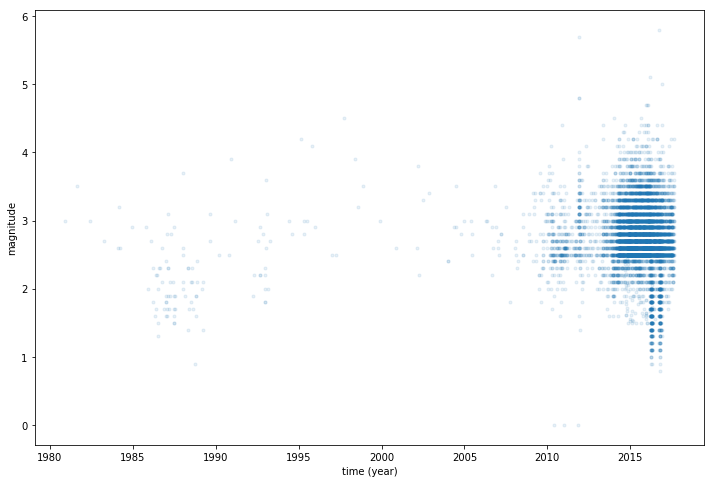

In [103]:
# Plot time vs. magnitude
plt.figure(figsize=(12,8))
_ = plt.plot(time,mags,marker='.',linestyle='none',alpha=0.1)

# Label axes and show the plot
_ = plt.xlabel('time (year)')
_ = plt.ylabel('magnitude')
plt.show()


**Estimates of the mean interearthquake times**


The graphical EDA in the last exercise shows an obvious change in earthquake frequency around 2010. To compare, compute the mean time between earthquakes of magnitude 3 and larger from 1980 through 2009 and also from 2010 through mid-2017. Also include 95% confidence intervals of the mean

In [117]:
# Compute mean interearthquake time
mean_dt_pre = np.mean(dt_pre)
mean_dt_post = np.mean(dt_post)
# Draw 10,000 bootstrap replicates of the mean
bs_reps_pre = dcst.draw_bs_reps(dt_pre,np.mean,size=10000)
bs_reps_post = dcst.draw_bs_reps(dt_post,np.mean,size=10000)

# Compute the confidence interval
conf_int_pre = np.percentile(bs_reps_pre,[2.5,97.5])
conf_int_post = np.percentile(bs_reps_post,[2.5,97.5])

# Print the results
print("""1980 through 2009
mean time gap: {0:.2f} days
95% conf int: [{1:.2f}, {2:.2f}] days""".format(mean_dt_pre, *conf_int_pre))

print("""
2010 through mid-2017
mean time gap: {0:.2f} days
95% conf int: [{1:.2f}, {2:.2f}] days""".format(mean_dt_post, *conf_int_post))


1980 through 2009
mean time gap: 204.61 days
95% conf int: [139.94, 277.90] days

2010 through mid-2017
mean time gap: 1.12 days
95% conf int: [0.97, 1.29] days


Holy cow! There is almost a 200-fold increase in earthquake frequency after 2010.

**Hypothesis test: did earthquake frequency change?**

Obviously, there was a massive increase in earthquake frequency once wastewater injection began. Nonetheless, we will still do a hypothesis test for practice. We will not test the hypothesis that the interearthquake times have the same distribution before and after 2010, since wastewater injection may affect the distribution. Instead, we will assume that they have the same mean. So, compute the p-value associated with the hypothesis that the pre- and post-2010 interearthquake times have the same mean, using the mean of pre-2010 time gaps minus the mean of post-2010 time gaps as your test statistic.

In [118]:
# Compute the observed test statistic
mean_dt_diff = mean_dt_pre - mean_dt_post

# Shift the post-2010 data to have the same mean as the pre-2010 data
dt_post_shift = dt_post - np.mean(dt_post) + mean_dt_pre

# Compute 10,000 bootstrap replicates from arrays
bs_reps_pre = dcst.draw_bs_reps(dt_pre,np.mean,10000)
bs_reps_post = dcst.draw_bs_reps(dt_post_shift,np.mean,10000)

# Get replicates of difference of means
bs_reps = bs_reps_pre - bs_reps_post

# Compute and print the p-value
p_val = np.sum(bs_reps >= mean_dt_diff) / 10000
print('p =', p_val)


p = 0.0


icely done! In 10,000 samples, not one had a test statistic greater than was was observed. The p-value is, predictably based on what we have done so far, is tiiiiiny!

#### Magnitude in Oklahoma

- The Gutenberg-Ritcher Law
- Compute b-values
- Perform Hypothesis Test

**EDA: Comparing magnitudes before and after 2010**

Make an ECDF of earthquake magnitudes from 1980 through 2009. On the same plot, show an ECDF of magnitudes of earthquakes from 2010 through mid-2017. 

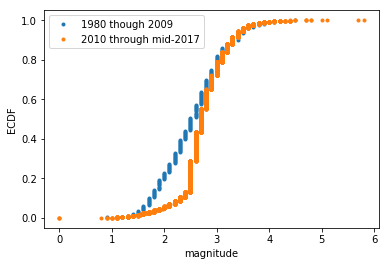

In [120]:
# Get magnitudes before and after 2010
mags_pre = mags[time< 2010]
mags_post = mags[time >= 2010]

# Generate ECDFs
_ = plt.plot(*dcst.ecdf(mags_pre),marker='.',linestyle='none')
_ = plt.plot(*dcst.ecdf(mags_post),marker='.',linestyle='none')
# Label axes and show plot
_ = plt.xlabel('magnitude')
_ = plt.ylabel('ECDF')
plt.legend(('1980 though 2009', '2010 through mid-2017'), loc='upper left')
plt.show()


Both curves seem to follow the Gutenberg-Richter Law, but with different completeness thresholds, probably due to improvements in sensing capabilities in more recent years.

**Quantification of the b-values**

In [121]:
# Compute b-value and confidence interval for pre-2010
b_pre, conf_int_pre = b_value(mags_pre, mt, perc=[2.5, 97.5],n_reps=10000)

# Compute b-value and confidence interval for post-2010
b_post, conf_int_post = b_value(mags_post, mt, perc=[2.5, 97.5],n_reps=10000)

# Report the results
print("""
1980 through 2009
b-value: {0:.2f}
95% conf int: [{1:.2f}, {2:.2f}]

2010 through mid-2017
b-value: {3:.2f}
95% conf int: [{4:.2f}, {5:.2f}]
""".format(b_pre, *conf_int_pre, b_post, *conf_int_post))



1980 through 2009
b-value: 0.74
95% conf int: [0.53, 0.98]

2010 through mid-2017
b-value: 0.63
95% conf int: [0.60, 0.65]



The confidence interval for the b-value for recent earthquakes is tighter than for earlier ones because there are many more recent ones. Still, the confidence intervals overlap, and we can perform a hypothesis test to see if we might get these results if the b-values are actually the same.

**How should we do a hypothesis test on differences of the b-value?**

- You should only include earthquakes that have magnitudes above the completeness threshold. A value of 3 is reasonable.
- We should perform a permutation test because asserting a null hypothesis that the b-values are the same implicitly assumes that the magnitudes are identically distributed, specifically Exponentially, by the Gutenberg-Richter Law.
- A reasonable test statistic is the difference between the mean post-2010 magnitude and the mean pre-2010 magnitude.
- You do not need to worry about the fact that there were far fewer earthquakes before 2010 than there were after. That is to say, there are fewer earthquakes before 2010, but sufficiently many to do a permutation test.
- You do not need to worry about the fact that the two time intervals are of different length.


![title](images/2.jpg)

Hypothesis test: are the b-values different?

In [122]:
# Only magnitudes above completeness threshold
mags_pre = mags_pre[mags_pre >= mt]
mags_post = mags_post[mags_post >= mt]

# Observed difference in mean magnitudes: diff_obs
diff_obs = np.mean(mags_post) - np.mean(mags_pre)

# Generate permutation replicates: perm_reps
perm_reps = dcst.draw_perm_reps(mags_post,mags_pre,dcst.diff_of_means,size=10000)

# Compute and print p-value
p_val = np.sum(perm_reps < diff_obs) / 10000
print('p =', p_val)

p = 0.1092


A p-value around 0.1 suggests that the observed magnitudes are commensurate with there being no change in b-value after wastewater injection began.

**Parkfield 1950 through 2009**
- b-value: 1.08
- 95% conf int: [0.94, 1.23]


**Oklahoma 1980 through 2009**
- b-value: 0.74
- 95% conf int: [0.54, 0.97]

- mean time gap: 204.61 days
- 95% conf int: [138.45, 276.83] days


**Oklahoma 2010 through mid-2017**
- b-value: 0.62
- 95% conf int: [0.60, 0.65]

- mean time gap: 1.12 days
- 95% conf int: [0.97, 1.30] days


**Oklahoma: p-value for difference in b-value : 0.10**


**Conclusion :**Oklahoma has a smaller b-value than the Parkfield region, so the Parkfield region has more earthquakes.